In [2]:
#Importing required libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import numpy as np
from matplotlib.colors import ListedColormap
# import matplotlib

# %matplotlib qt

In [25]:
# These folders contain simulations run with a toriodal environent and dispersion parameter of 15. 
# The environment is sin function on blue, and 0 on both red and green.
# Basically I re-run these because I realised my environments were wrong and not perfectly toriodal and also I preferred to have 0 on red and green, while before my environments were 0 on red and 127 on green 

# List of folder paths
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/w5',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/w10',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/w25',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/w50',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/w100',]
# Define folder labels
folder_labels = [5, 10, 25, 50, 100]

In [18]:
#Define the folders containing the csv files
# List of folder paths
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over5/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over10/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over25/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over50/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over100/mh',]
# Define folder labels
folder_labels = [5, 10, 25, 50, 100]


In [ ]:
#freq that are on blue as sin, red as 0 and green on 127, 64 BITS GENOME
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/5w_64_bits',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/10w_64_bits',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/25w_64_bits',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/50w_64_bits',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/100w_64_bits',]
# Define folder labels
folder_labels = [ 5, 10, 25, 50, 100]

In [ ]:
#freq that are on blue as sin, red as 0 and green on 127
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over50/mh',]
# Define folder labels
folder_labels = [50]

In [26]:
# Create a list to store individual DataFrames
dataframes = []

for i, folder_path in enumerate(folder_paths):
    # Loop through each file in the folder and read it into a DataFrame
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_log_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            #df = pd.read_csv(file_path, sep=',', header=0, usecols=[0, 5], names=['Iteration_number', 'Species_count'])
            
            df = pd.read_csv(file_path, sep=',', header=0, usecols=[0, 5])
            
            # Remove duplicates
            df = df.drop_duplicates()
            
            # Add 'simulation' and 'folder_label' columns
            df['Simulation'] = filename
            df['Environment'] = folder_labels[i]
            
            # Append the modified DataFrame to the list
            dataframes.append(df)

# Concatenate all data in a pandas dataframe
combined_df = pd.concat(dataframes, ignore_index=True)


In [28]:
# Calculate Average and Medians
average_species_count = combined_df.groupby(['Environment', 'Iteration_Number'])['Species_Count'].mean().reset_index()
median_species_count = combined_df.groupby(['Environment', 'Iteration_Number'])['Species_Count'].median().reset_index()


<function matplotlib.pyplot.show(close=None, block=None)>

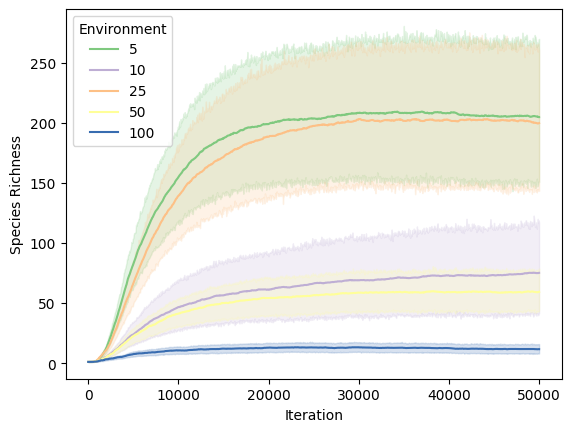

In [27]:
# Plot Iteration number VS species richness
sns.lineplot( data = combined_df, x = 'Iteration_Number', y = 'Species_Count', hue = 'Environment', palette = 'Accent')
plt.xlabel("Iteration")
plt.ylabel("Species Richness")
plt.show

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_23922/325381752.py:14: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.2)


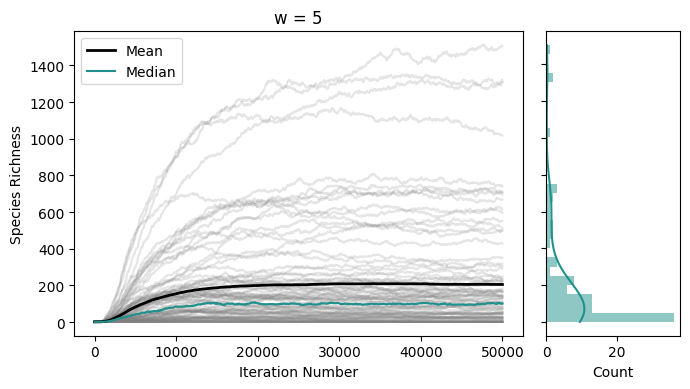

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_23922/325381752.py:14: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.2)


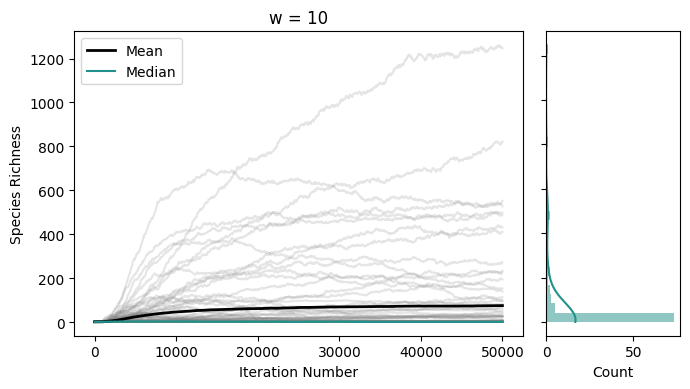

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_23922/325381752.py:14: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.2)


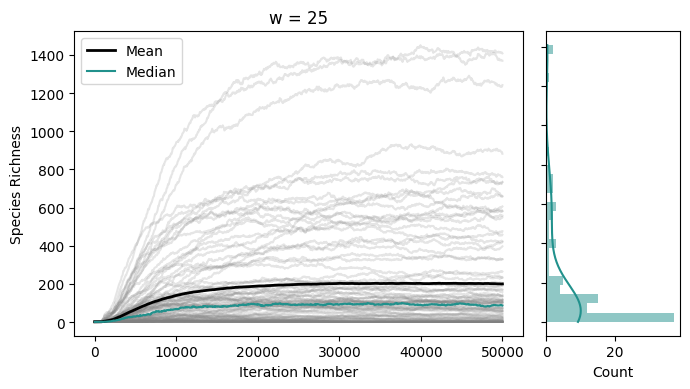

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_23922/325381752.py:14: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.2)


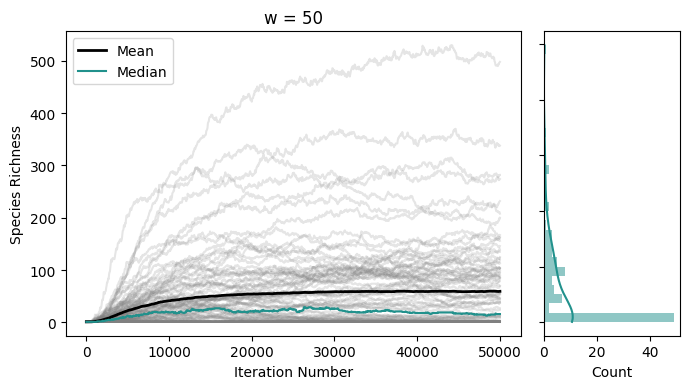

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_23922/325381752.py:14: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.2)


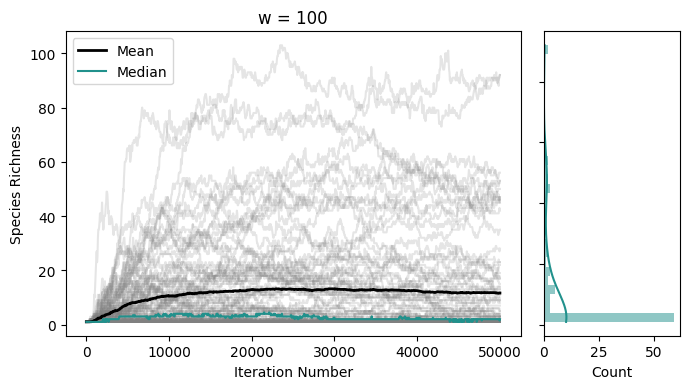

In [29]:
palette = ['gray']
import matplotlib.gridspec as gridspec

# Group the combined DataFrame by 'Environment'
grouped_df = combined_df.groupby('Environment')

# Plot for each environment
for environment, data in grouped_df:
    fig = plt.figure(figsize=(7, 4))
    gs = gridspec.GridSpec(3, 4)
    ax_main = plt.subplot(gs[:, :3])  # Adjusted the column index
    ax_yDist = ax_yDist = plt.subplot(gs[:, 3])
    
    sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.2)
    # Calculate mean and median for each iteration
    mean_values = data.groupby('Iteration_Number')['Species_Count'].mean()
    meadian_value = data.groupby('Iteration_Number')['Species_Count'].median()
    # Plot mean line
    ax_main.plot(mean_values.index, mean_values.values,  color='Black', linewidth = 2 , label='Mean')
    ax_main.plot(meadian_value.index, meadian_value.values,  color=plt.cm.viridis(0.5), linestyle='-', label='Median')
    
    # Plot distribution at equilibrium
    data_hist = data[data['Iteration_Number'] == 49999]
    sns.histplot(data = data_hist, y = 'Species_Count', bins=30, ax=ax_yDist, color=plt.cm.viridis(0.5),kde=True, edgecolor = 'none' ) 
    
    # Set title and axis
    ax_main.set_title(f"w = {environment}")
    ax_main.set_xlabel("Iteration Number")
    ax_main.set_ylabel("Species Richness")

    # Remove labels of numbers on the y-axis ans set labels
    ax_yDist.set_yticklabels([])
    ax_yDist.set_xlabel("Count")
    ax_yDist.set(ylabel=None)
    
    # Reduce the space between subplots
    plt.subplots_adjust(wspace=0.0)  
    
    # Show legend
    ax_main.legend()
    plt.tight_layout()
    plt.show()

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_23922/2200710964.py:13: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


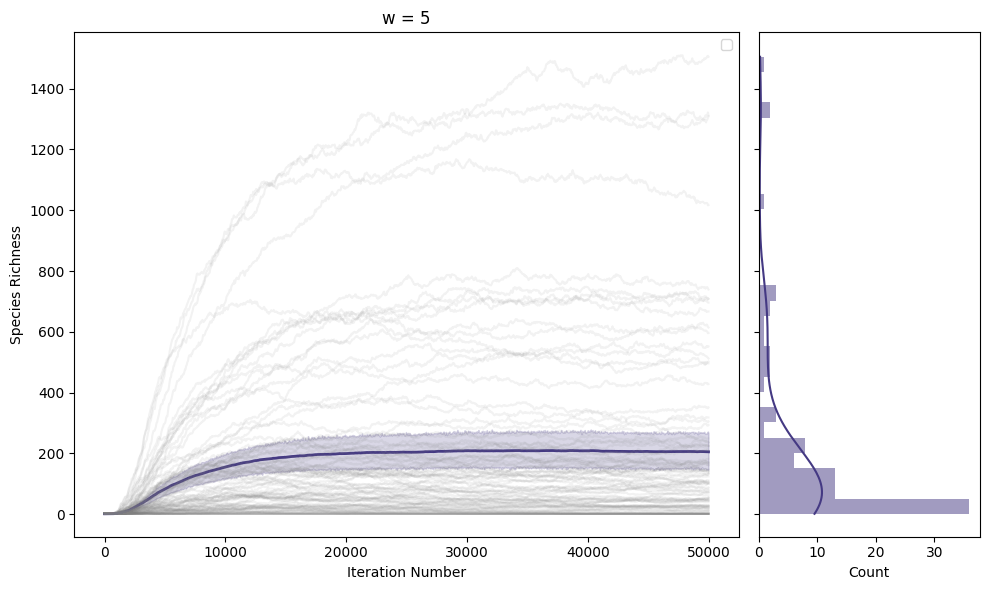

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_23922/2200710964.py:13: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


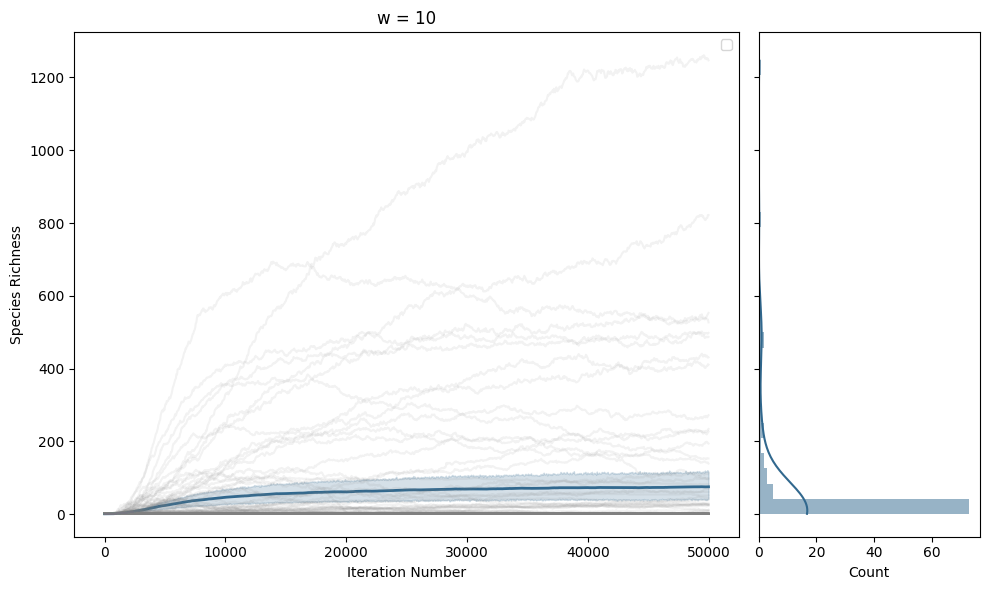

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_23922/2200710964.py:13: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


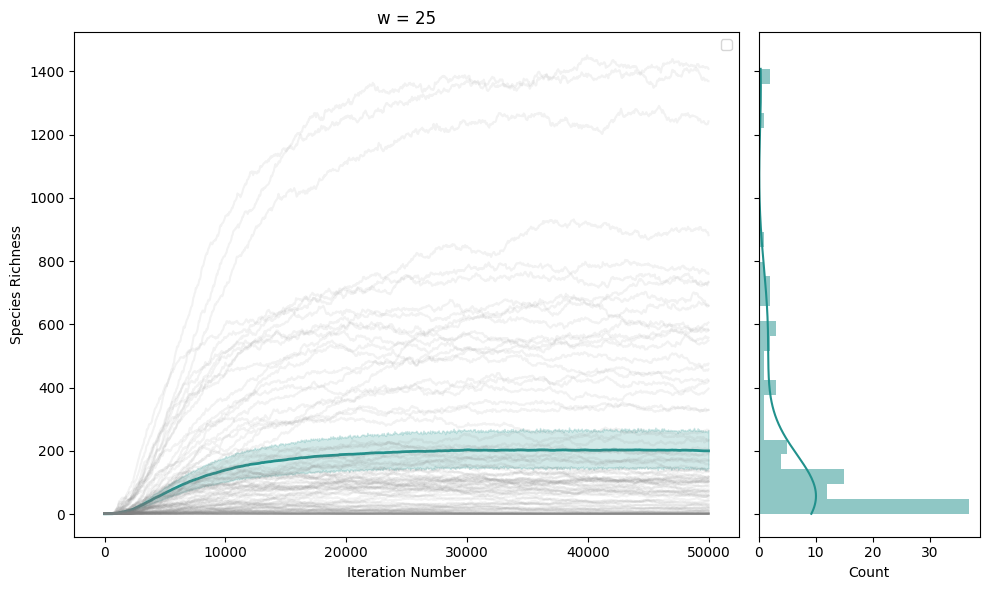

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_23922/2200710964.py:13: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


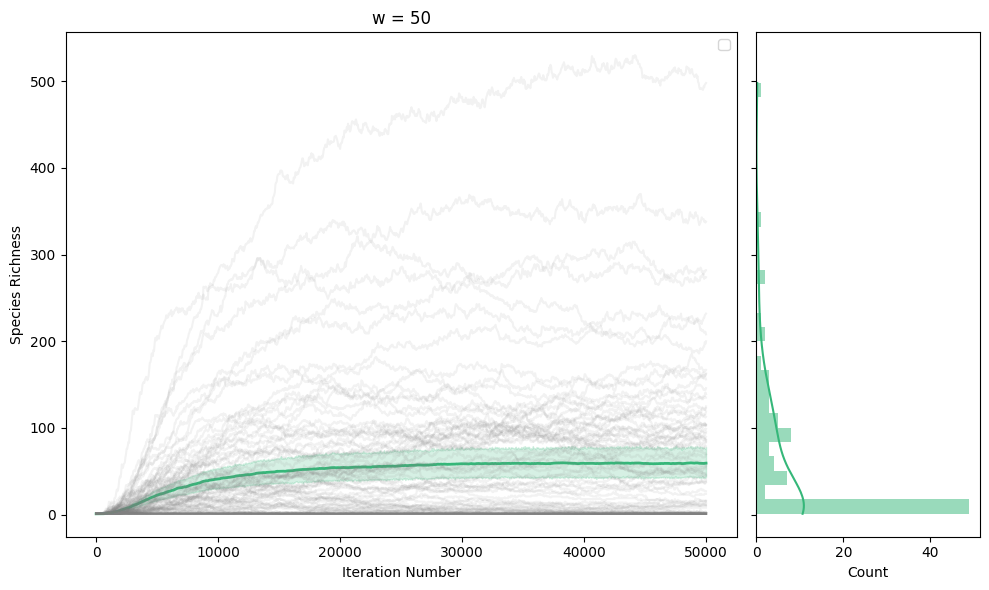

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_23922/2200710964.py:13: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


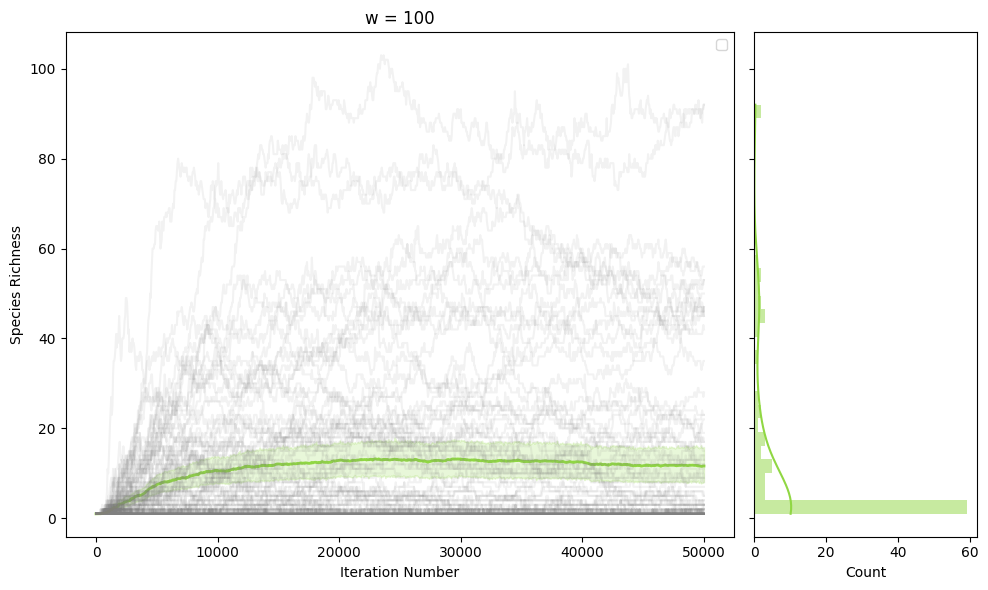

In [7]:
# Define the number of unique environments for coloring
num_environments = len(grouped_df)
colors = sns.color_palette("viridis", num_environments)
palette = ['gray']

# Plot for each environment
for i, (environment, data) in enumerate(grouped_df):
    fig, (ax_main, ax_yDist) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 1]}, sharey=True)

    # lineplot with confidence interval
    sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', linewidth = 2 , color=colors[i], ax=ax_main)
    # lineplot with all lines, comment if you do not want it
    sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1)

    # Plot distribution at equilibrium using Seaborn's histplot
    # Filter the data for the iteration where Iteration_number equals 49999
    data_hist = data[data['Iteration_Number'] == 49999]
    sns.histplot(data=data_hist, y='Species_Count', bins=30, ax=ax_yDist, color=colors[i], kde=True, edgecolor = 'none', linewidth = 2 )

    # Set title and axis
    ax_main.set_title(f"w = {environment}")
    ax_main.set_xlabel("Iteration Number")
    ax_main.set_ylabel("Species Richness")

    # Remove labels of numbers on the y-axis and set labels for the second subplot
    ax_yDist.set_xlabel("Count")
    ax_yDist.set_ylabel('')

    # Reduce the space between subplots
    plt.subplots_adjust(wspace=0.05)  # Adjust as needed

    # Show legend
    ax_main.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# Get unique simulation values
simulations = combined_df['Simulation'].unique()
# Create a line plot for each simulation
for simulation in simulations:
    # Filter data for the current simulation
    simulation_data = combined_df[combined_df['Simulation'] == simulation]
    sns.lineplot(data=simulation_data, x='Iteration_Number', y='Species_Count', hue='Simulation')
    
    # Add title
    plt.title(f'Line Plot for Simulation: {filename}')
    
    # Show the plot
    plt.show()

In [ ]:
# bug = combined_df[combined_df['Simulation'] == 'REvoSim_log_1.txt']
# bug.to_csv('faulty_sim.csv', index=False)

Text(0.5, 1.0, 'Mean Species Richness at Equilibrium')

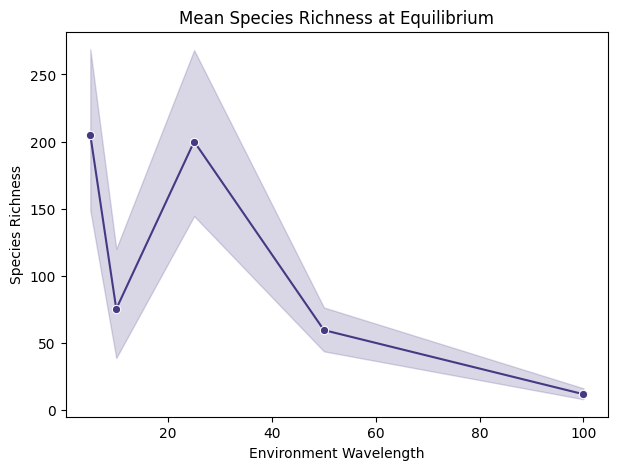

In [30]:
### Now I'm creating a graph that will show the wavelength on the xaxis and the average/median SP that we had at equilibrium
equilibrium = combined_df[combined_df['Iteration_Number'] == 49999]

plt.figure(figsize=(7, 5))
sns.lineplot(data =  equilibrium, x = 'Environment', y = 'Species_Count', color = colors[0], marker='o')
plt.xlabel('Environment Wavelength')
plt.ylabel('Species Richness')
plt.title('Mean Species Richness at Equilibrium')

In [ ]:
# relative abundaces over time
# Create a list to store individual DataFrames
dataframes = []

for i, folder_path in enumerate(folder_paths):
    # Loop through each file in the folder and read it into a DataFrame
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_log_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path, sep=',', header=0, usecols=[0, 6, 9])
            # calculate relative abundance
            # group by 'Iteration_Number' and 'Species_ID', sum up 'Species_Population'
            grouped = df.groupby(["Iteration_Number", 'Species_ID'])['Species_Population'].sum().reset_index()
            
            # Add 'simulation' and 'folder_label' columns
            grouped['Simulation'] = filename
            grouped['Environment'] = folder_labels[i]
            # total population for each iteration
            total_population = grouped.groupby('Iteration_Number')['Species_Population'].sum()

            # relative abundance:
            grouped['Rel_ab'] = grouped.apply(lambda row: row['Species_Population']/total_population[row['Iteration_Number']], axis=1)
            
            # Append the modified DataFrame to the list
            dataframes.append(grouped)

# Concatenate all DataFrames in the list
abundances = pd.concat(dataframes, ignore_index=True)

In [ ]:
# Make a line graph with species abundances
# I esclude scpecies 1 because they are the most dominand and the common ancestor

# Step 1: Select 5 random simulations from the 5 different environments
selected_simulations = []

for env_label in [5, 10, 25, 50, 100]:
    # Filter dataframes by environment label
    environment_dataframes = [df for df in dataframes if df['Environment'].iloc[0] == env_label]
    # Randomly select one dataframe from this environment
    selected_df = random.choice(environment_dataframes)
    selected_simulations.append(selected_df)

# Step 2: Filter out Species_ID == 1 for each selected simulation
for df in selected_simulations:
    df_filtered = df[df['Species_ID'] != 1]

    # Step 3: Create graphs for each filtered simulation
    plt.figure(figsize=(10, 6))
    # Use Seaborn to create the graph
    sns.lineplot(data=df_filtered, x='Iteration_Number', y='Species_Population', hue='Species_ID', 
                 palette='colorblind', legend=False)
    plt.title(f'Simulation - Environment {df_filtered["Environment"].iloc[0]} (Species_ID != 1)')
    plt.xlabel('Iteration Number')
    plt.ylabel('Species Population')
    plt.tight_layout()
    plt.show()
